In [1]:
library(ggplot2)
library(viridis)

Loading required package: viridisLite



In [2]:
data = read.table("subfigs/performance/jsd.csv", sep=",", header=TRUE)

In [3]:
data$jsd.values = data$jsd.values*sqrt(log2(exp(1)))

In [4]:
vec = c("observed", "uncorrected", "corrected")

In [5]:
data_profile = data[data$atac.versus.dnase %in% vec,]

In [6]:
data_profile$jsd.values = data_profile$jsd.values


In [7]:
data_profile$atac.versus.dnase <- factor(data_profile$atac.versus.dnase , levels=c("observed", "uncorrected", "corrected"))


In [20]:
filtered_data <- subset(data_profile, atac.versus.dnase == "observed")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$jsd.values, na.rm = TRUE)
std_value <- sd(filtered_data$jsd.values, na.rm = TRUE)
print(round(mean_value, digits = 2))
print(round(std_value, digits = 2))

[1] 0.81
[1] 0.08


In [21]:
filtered_data <- subset(data_profile, atac.versus.dnase == "uncorrected")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$jsd.values, na.rm = TRUE)
std_value <- sd(filtered_data$jsd.values, na.rm = TRUE)
print(round(mean_value, digits = 2))
print(round(std_value, digits = 2))

[1] 0.58
[1] 0.03


In [22]:
filtered_data <- subset(data_profile, atac.versus.dnase == "corrected")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$jsd.values, na.rm = TRUE)
std_value <- sd(filtered_data$jsd.values, na.rm = TRUE)
print(round(mean_value, digits = 2))
print(round(std_value, digits = 2))

[1] 0.26
[1] 0.08


Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Saving 7 x 7 in image
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


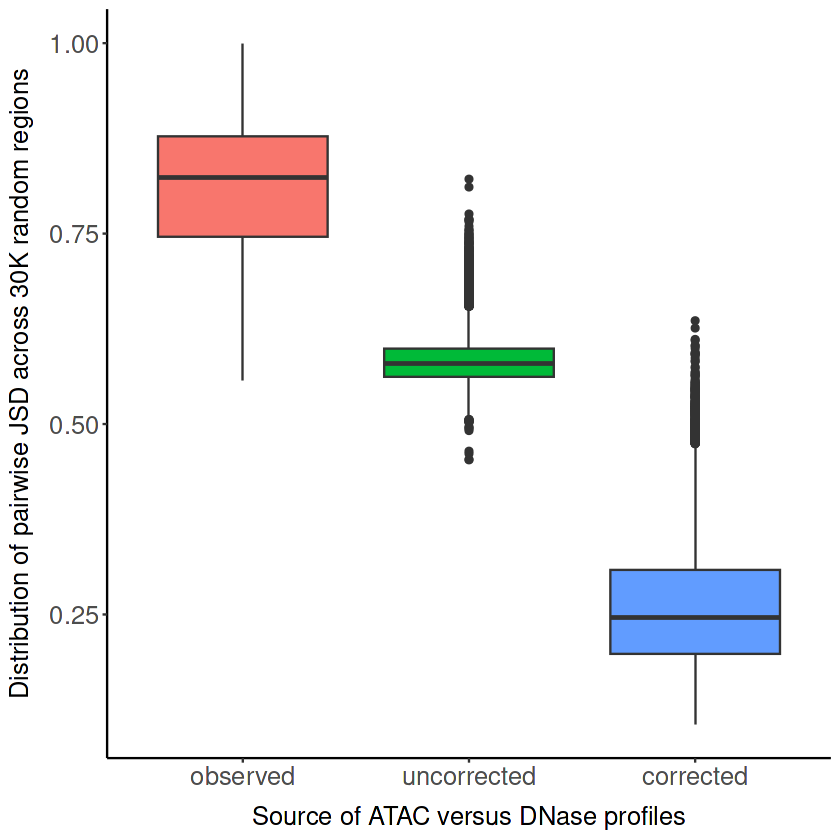

In [11]:

ggplot(data_profile, aes(x=atac.versus.dnase, y=jsd.values, fill=atac.versus.dnase)) +
geom_boxplot() +
theme_classic() + 
    xlab("Source of ATAC versus DNase profiles") + 
    ylab("Distribution of pairwise JSD across 30K random regions") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) 

ggsave("subfigs/performance/profiles.pdf", dpi=300, device="pdf")

In [12]:
data_importance= data[!(data$atac.versus.dnase %in% vec),]

In [19]:
filtered_data <- subset(data_importance, atac.versus.dnase == "profile")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$jsd.values, na.rm = TRUE)
std_value <- sd(filtered_data$jsd.values, na.rm = TRUE)
print(round(mean_value, digits = 2))
print(round(std_value, digits = 2))

[1] 0.1
[1] 0.03


In [18]:
filtered_data <- subset(data_importance, atac.versus.dnase == "uncorrected profile")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$jsd.values, na.rm = TRUE)
std_value <- sd(filtered_data$jsd.values, na.rm = TRUE)
print(round(mean_value, digits = 2))
print(round(std_value, digits = 2))

[1] 0.15
[1] 0.03


In [35]:
data_importance$atac.versus.dnase <- factor(data_importance$atac.versus.dnase , levels=c("uncorrected counts", "counts", "uncorrected profile", "profile"))


Saving 7 x 7 in image


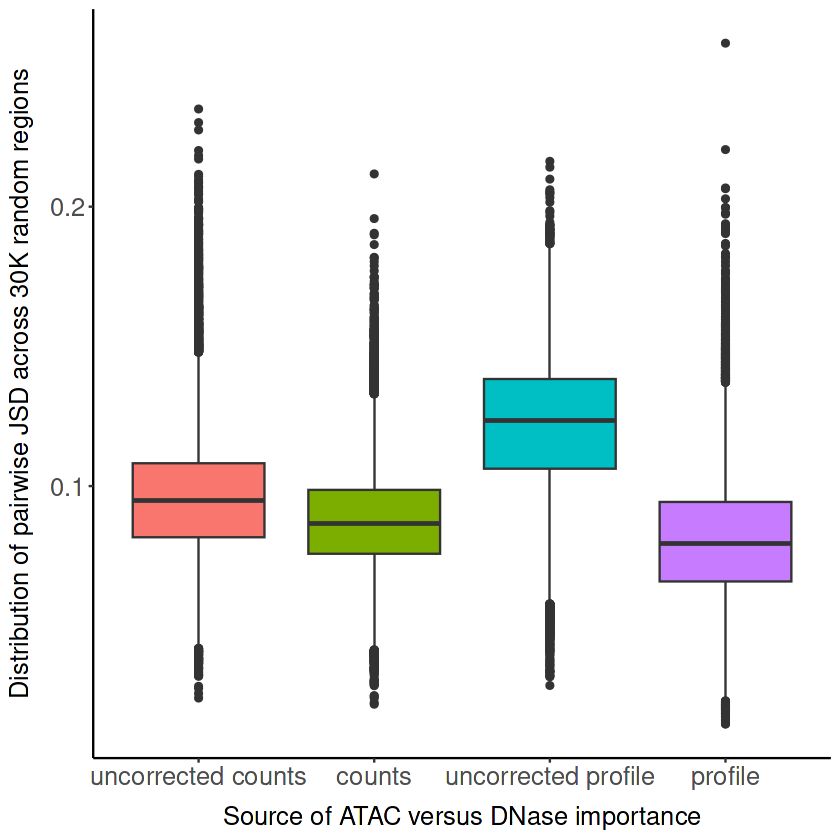

In [36]:
ggplot(data_importance, aes(x=atac.versus.dnase, y=jsd.values, fill=atac.versus.dnase)) +
geom_boxplot() +
theme_classic() + 
      xlab("Source of ATAC versus DNase importance") + 
      ylab("Distribution of pairwise JSD across 30K random regions") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) 

ggsave("subfigs/performance/importance.pdf", dpi=300, device="pdf")